In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
ordinal_lasso = pd.read_csv('../../Machine Learning Models/Stacking/Ensemble(L+GB)/Ordinal+Lasso.csv')
ordinal_lasso.shape

(2580, 84)

In [3]:
ordinal_lasso

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Lasso
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,119703.199217
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,117288.214611
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,131483.009302
3,3,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,2.0,2.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,4,535377150,1039,114000,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,107135.108496
4,4,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,5,534177230,1665,227000,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,209329.873468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2575,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,3.0,1.0,0.0,1.0,1.0,6.0,2.0,5.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,759,903205040,952,121000,68.516053,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,116944.037420
2576,2576,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,0.0,4.0,3.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,760,905402060,1733,139600,68.516053,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,137754.278621
2577,2577,15.0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,6.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,761,909275030,2002,145000,82.000000,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,164436.

In [4]:
X_ordinal = ordinal_lasso.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_lasso.SalePrice.values

In [5]:
X_ordinal.shape

(2580, 83)

In [6]:
len(Y_ordinal)

2580

In [7]:
X_ordinal.shape[1]

83

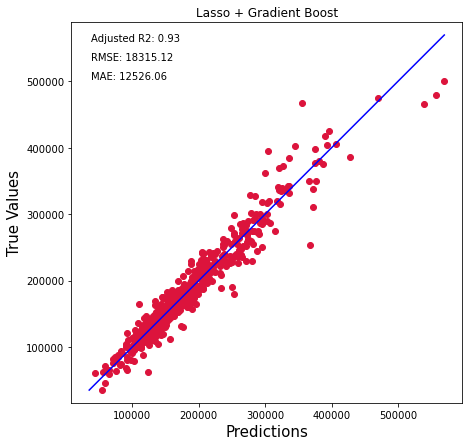

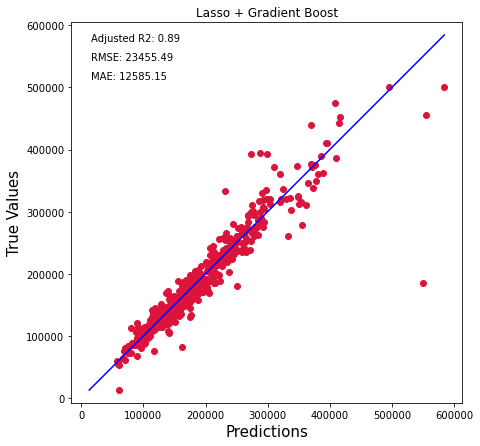

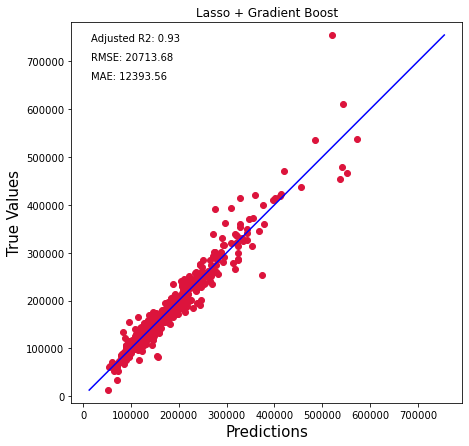

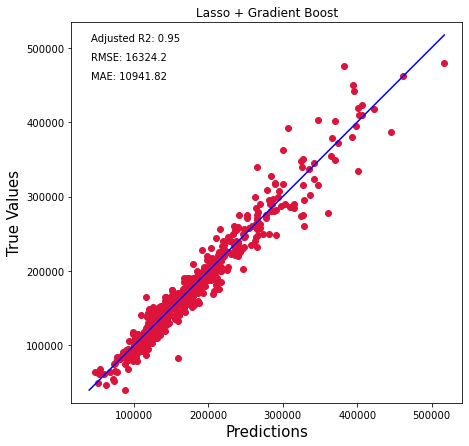

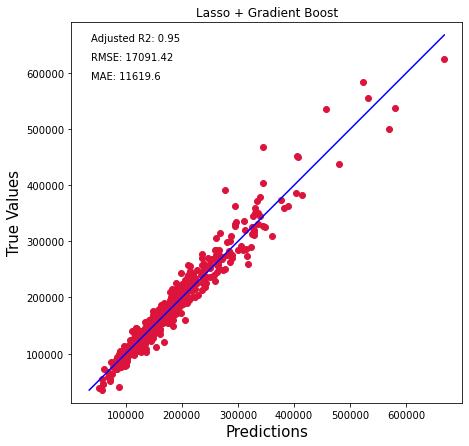

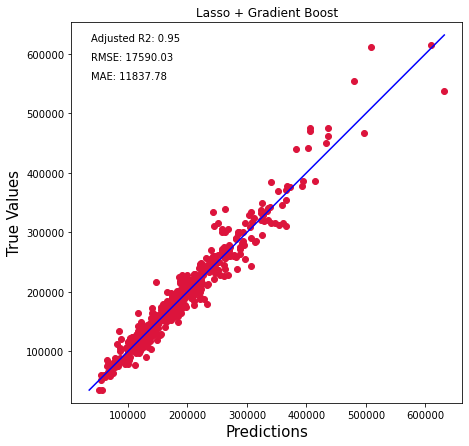

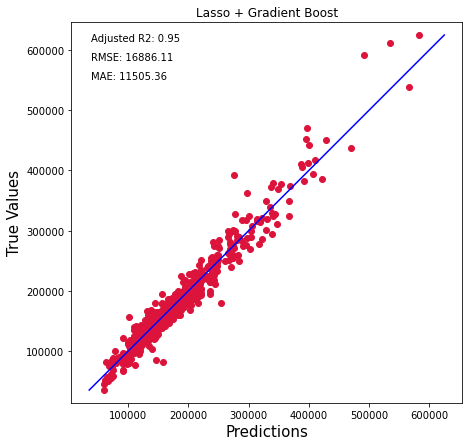

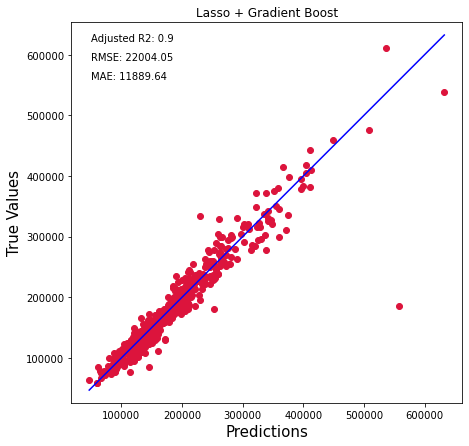

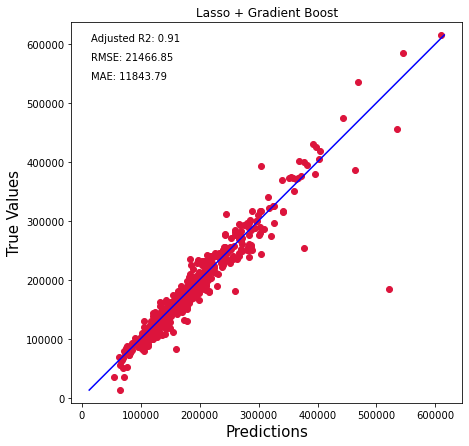

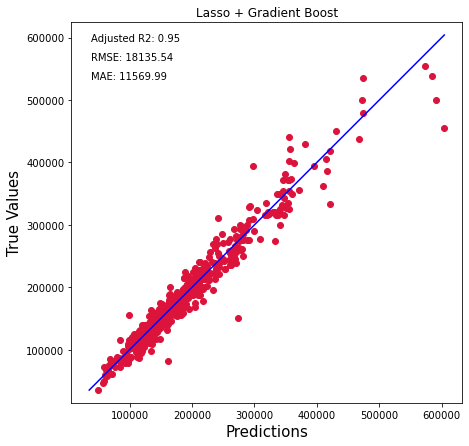

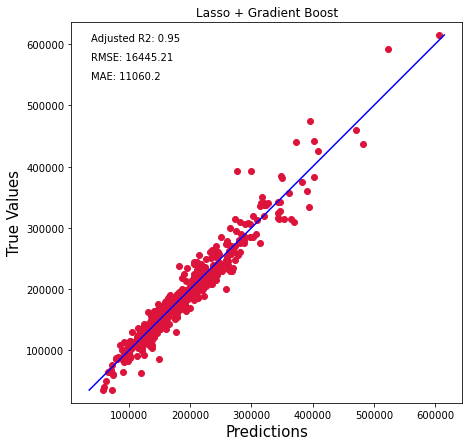

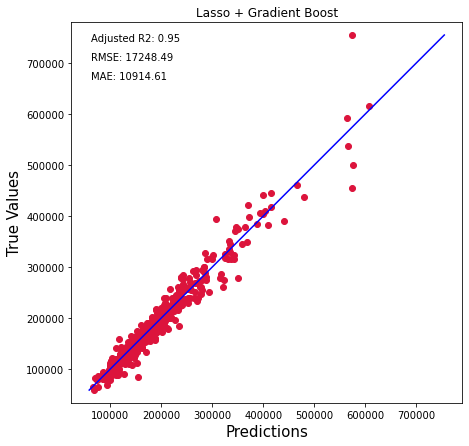

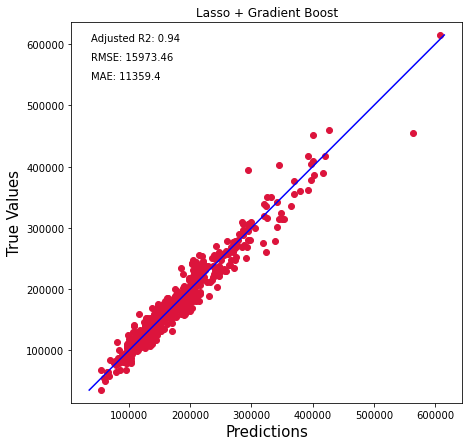

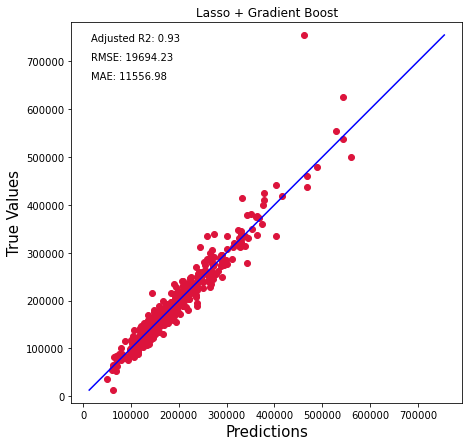

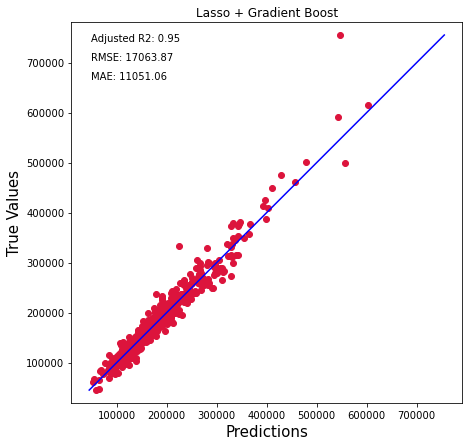

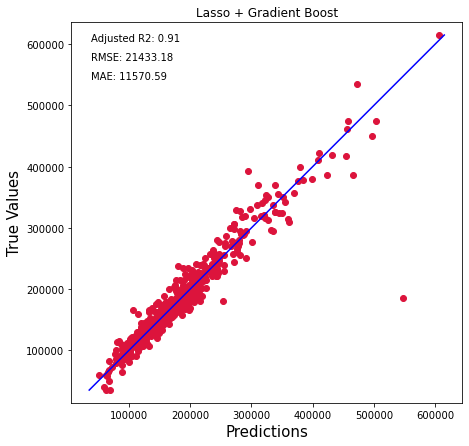

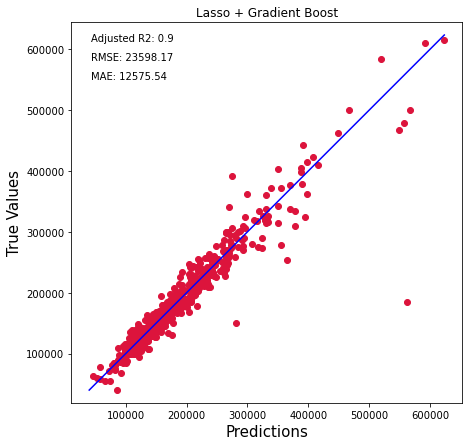

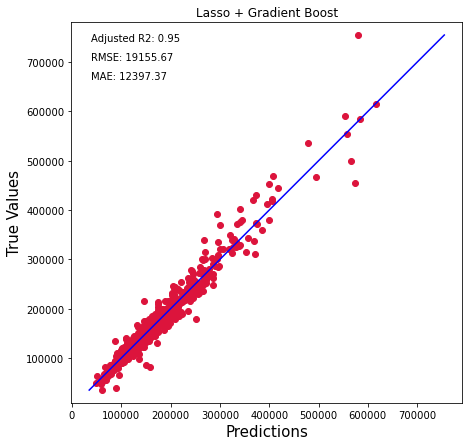

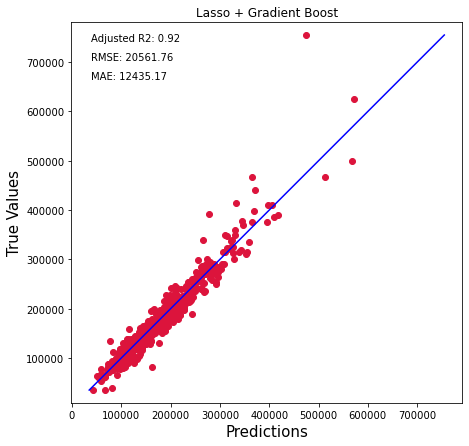

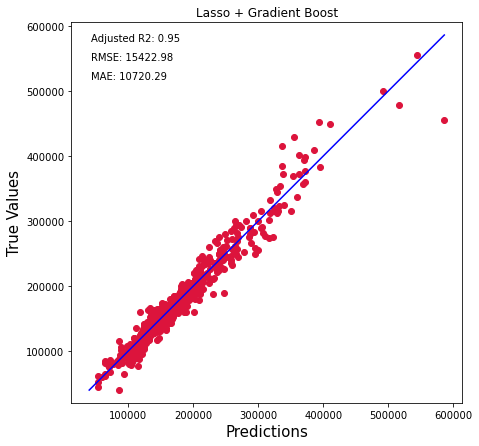

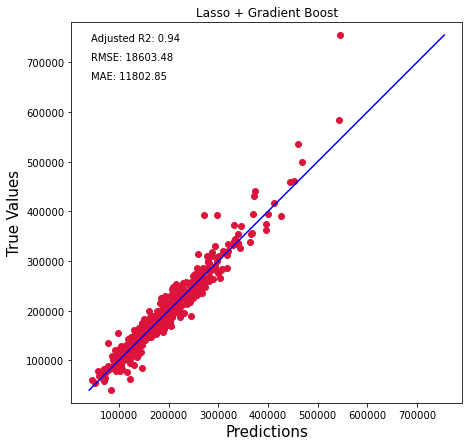

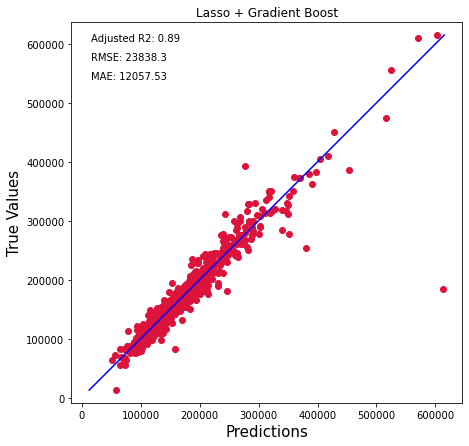

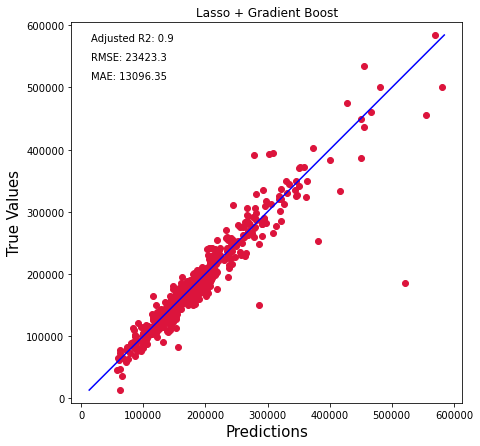

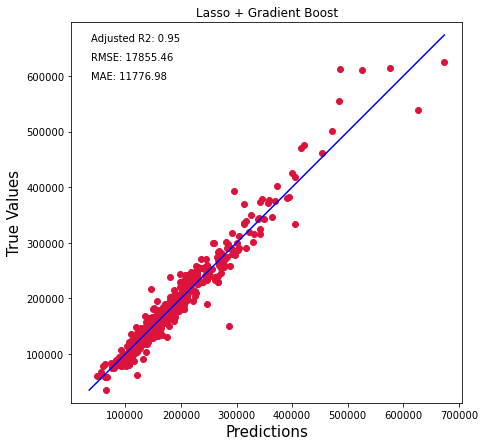

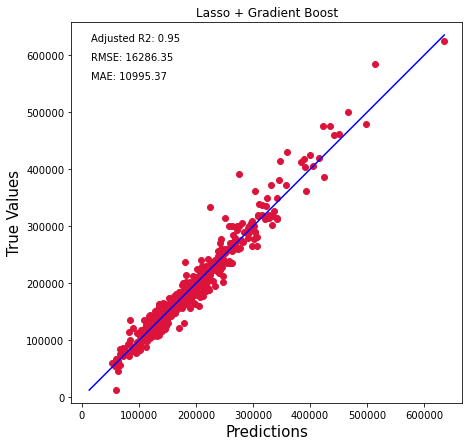

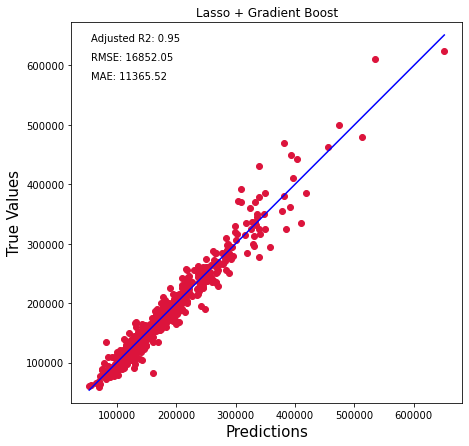

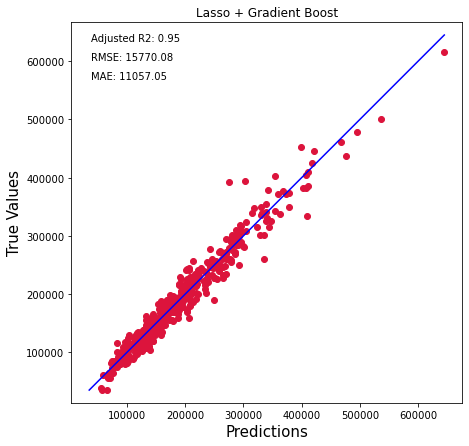

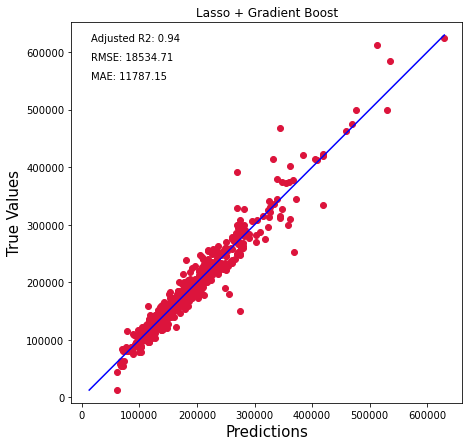

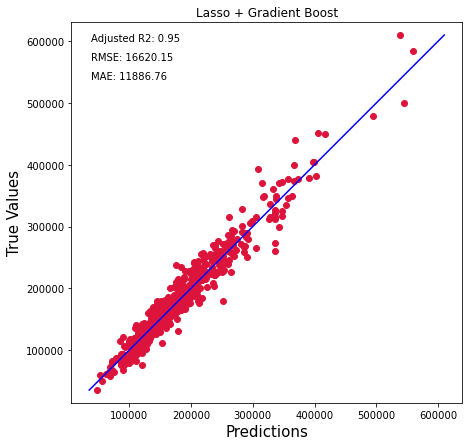

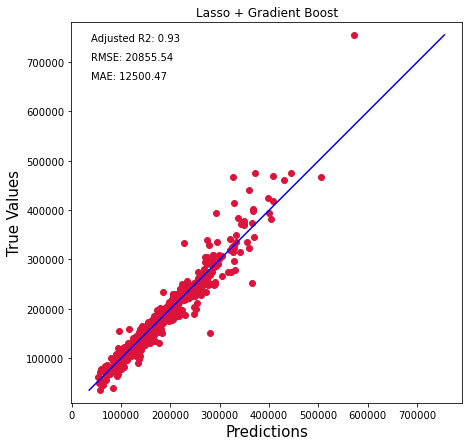

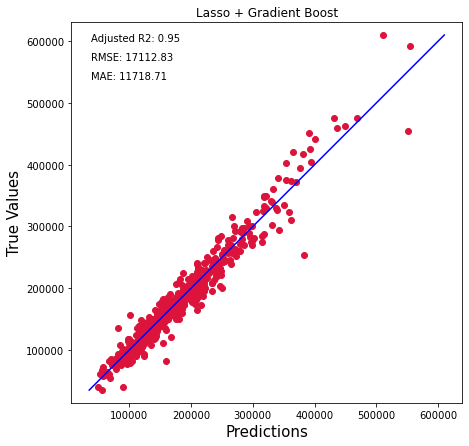

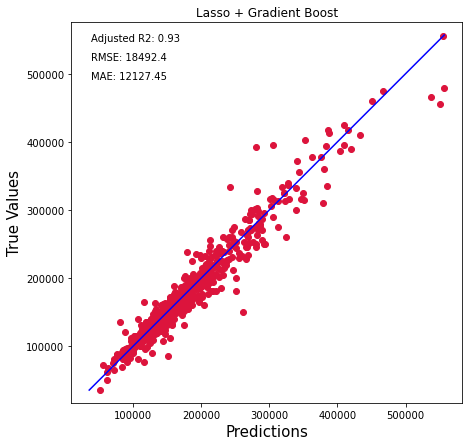

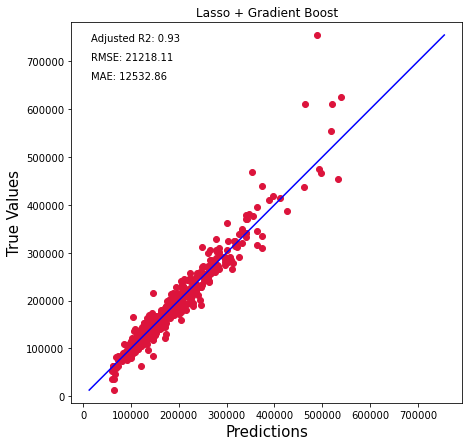

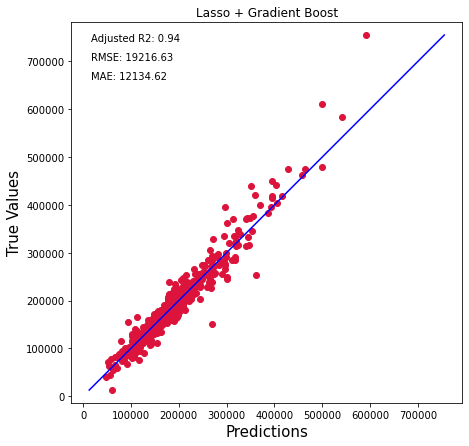

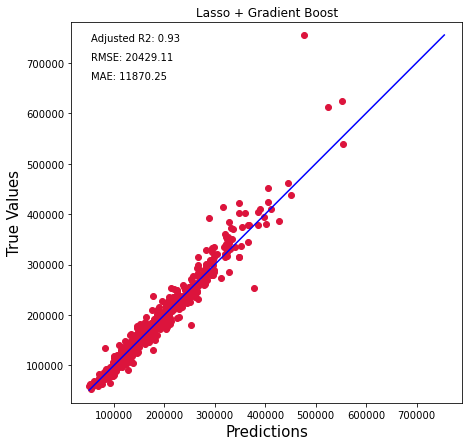

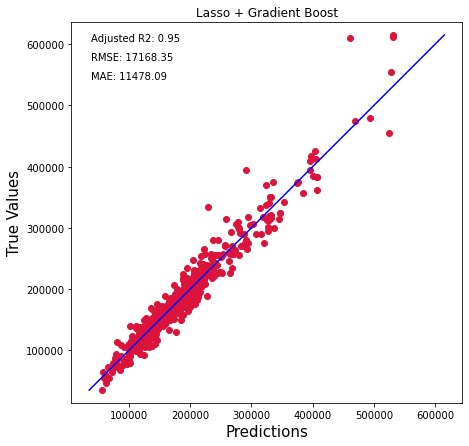

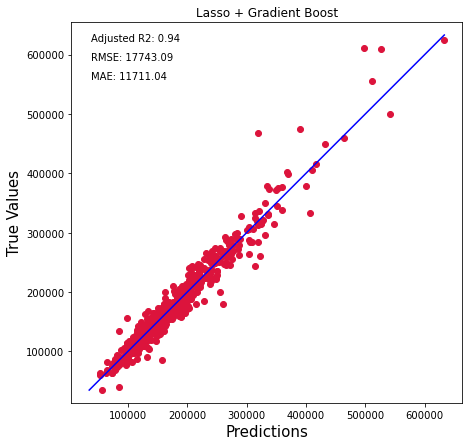

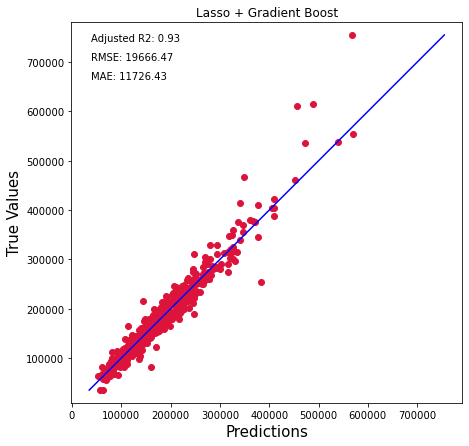

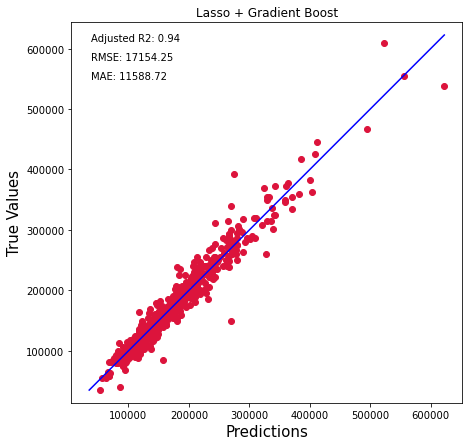

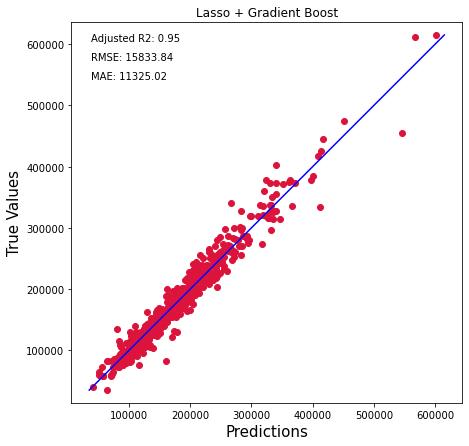

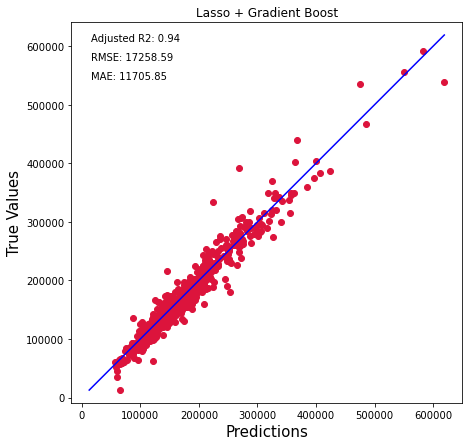

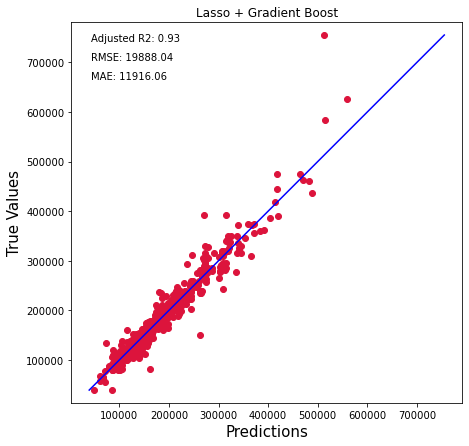

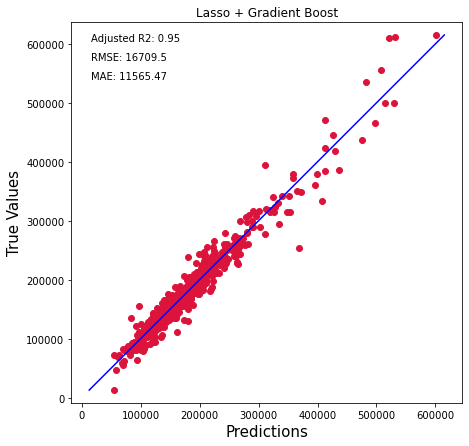

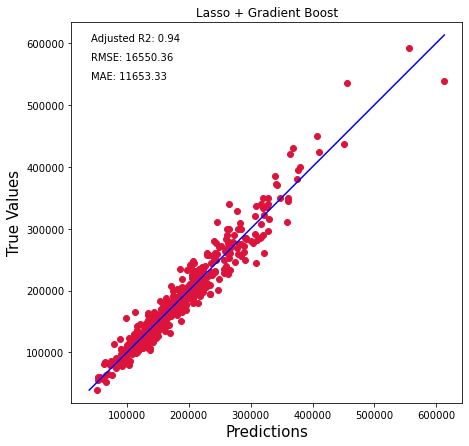

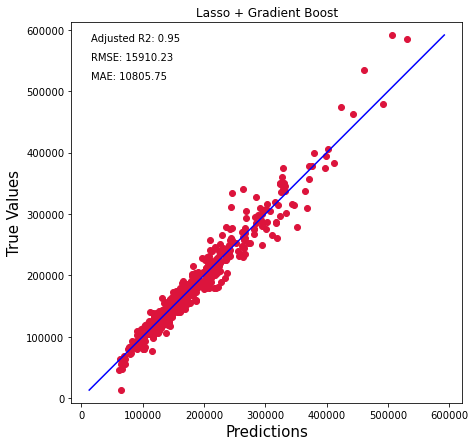

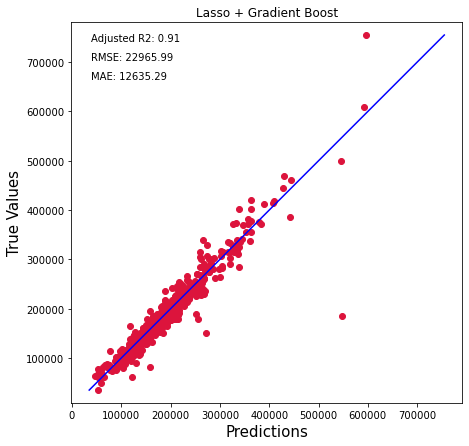

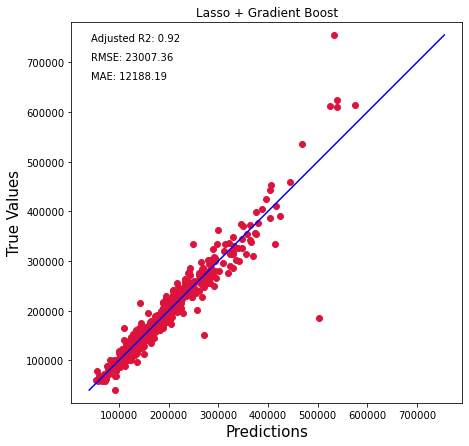

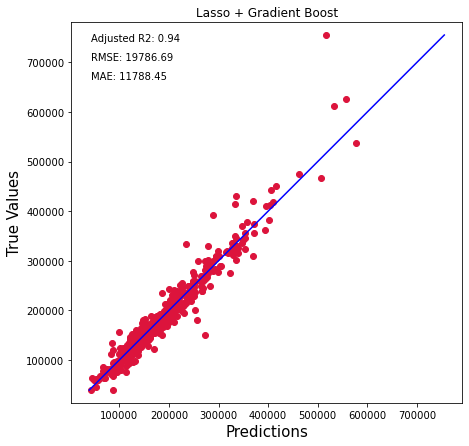

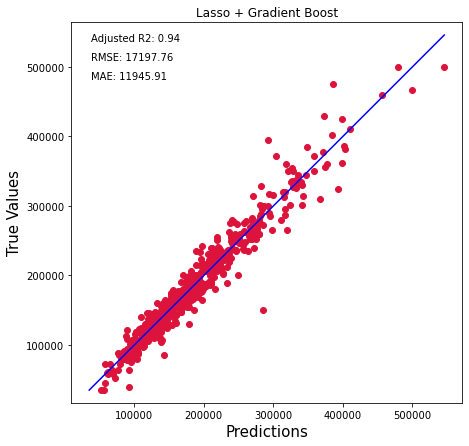

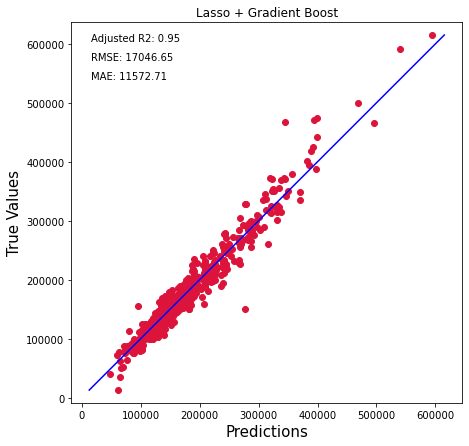

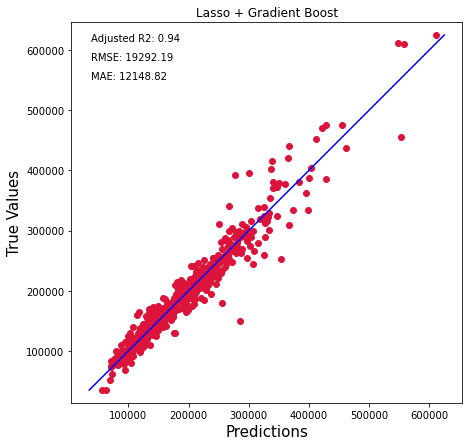

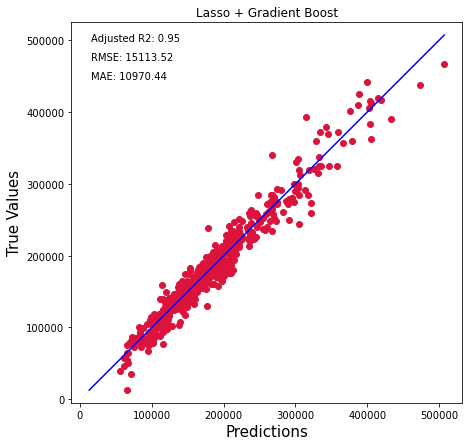

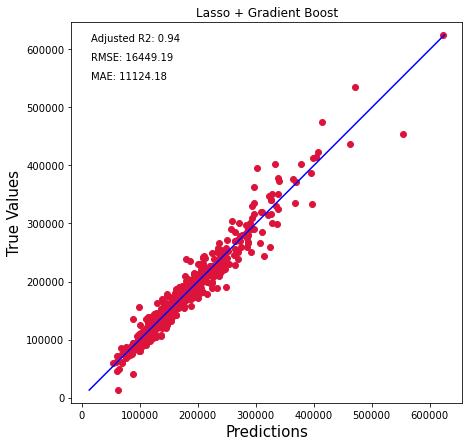

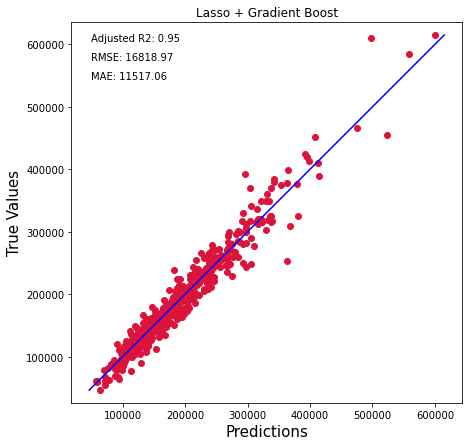

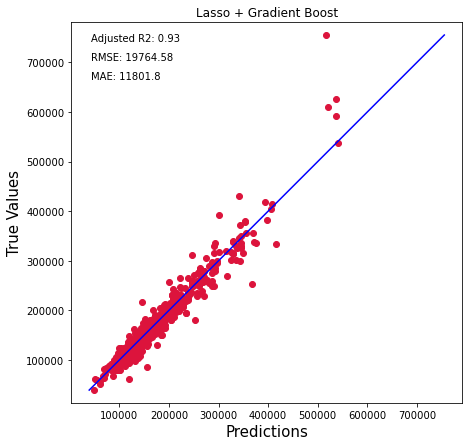

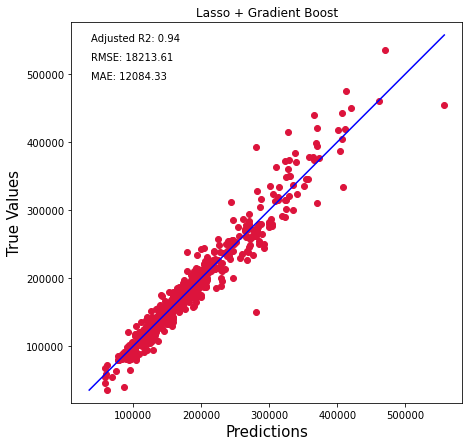

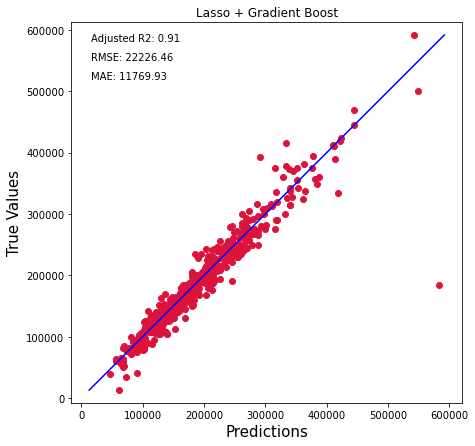

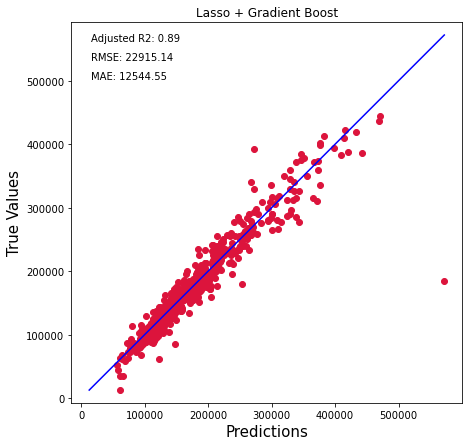

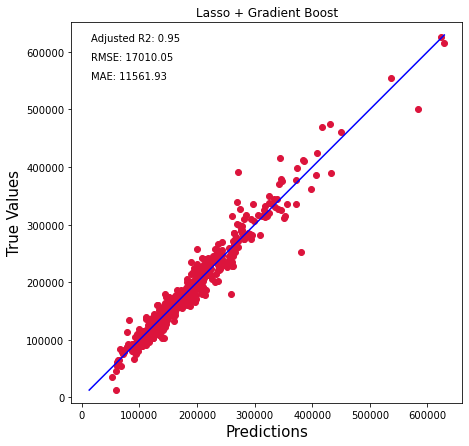

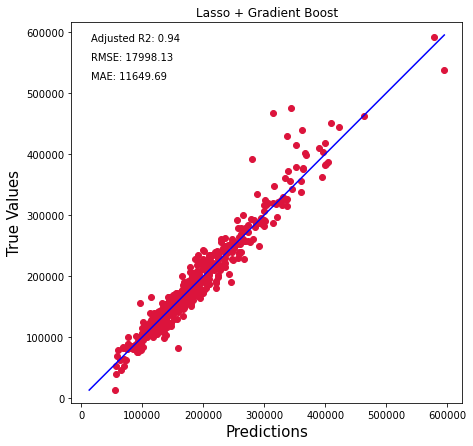

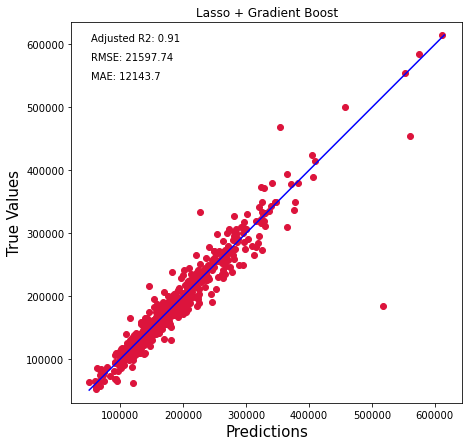

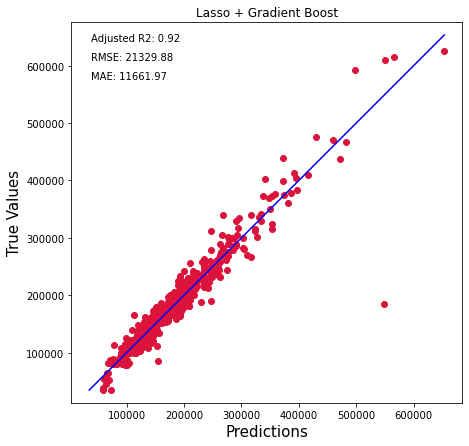

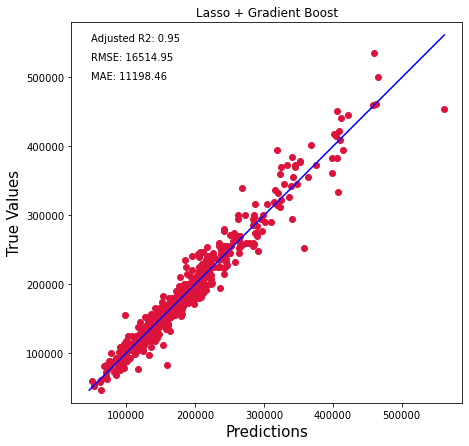

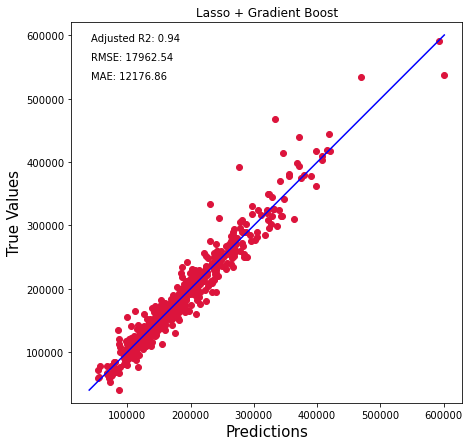

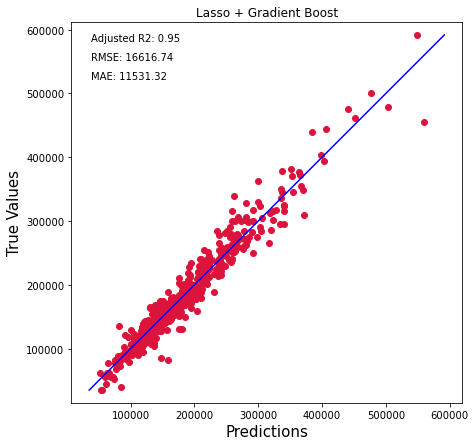

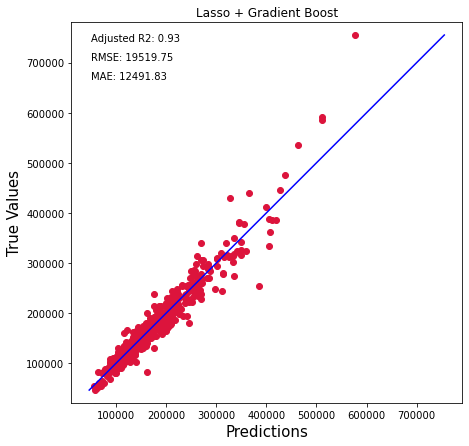

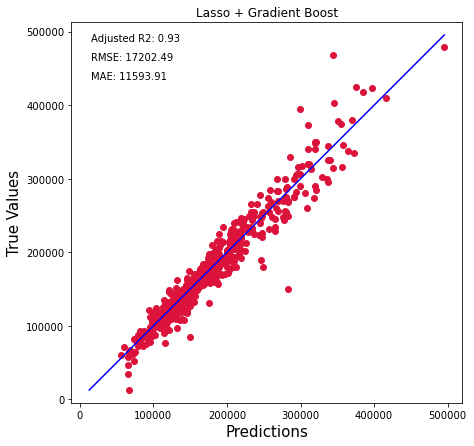

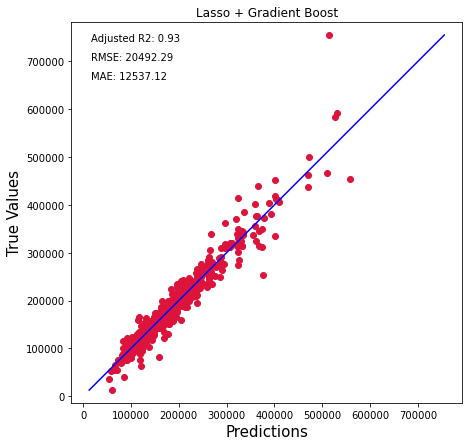

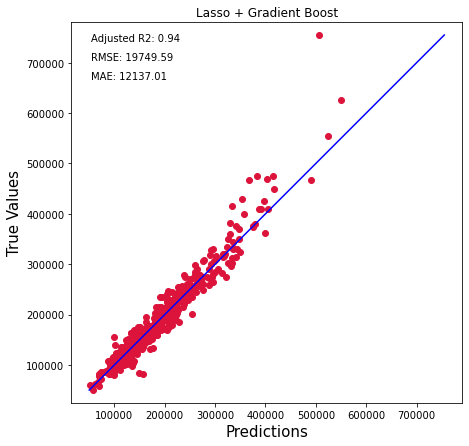

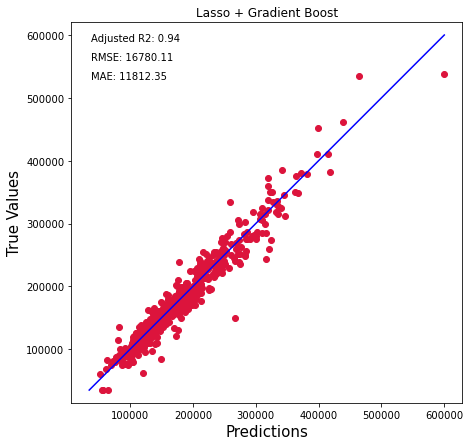

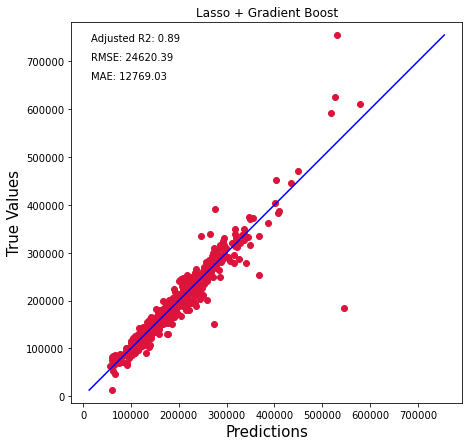

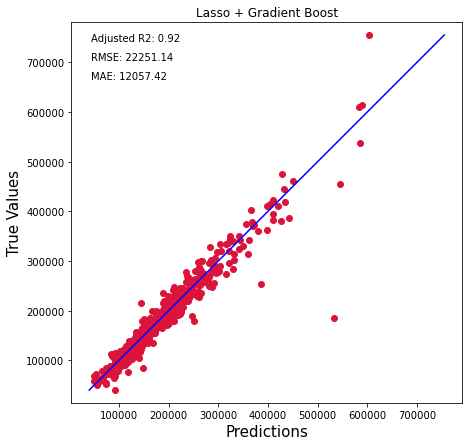

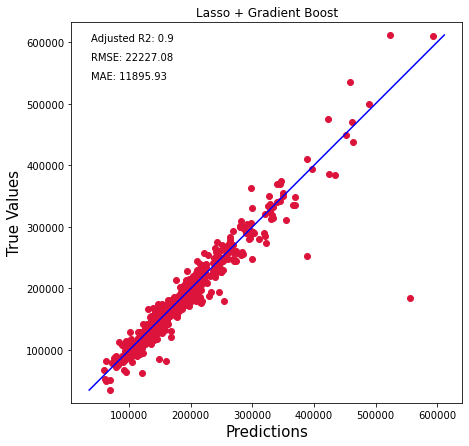

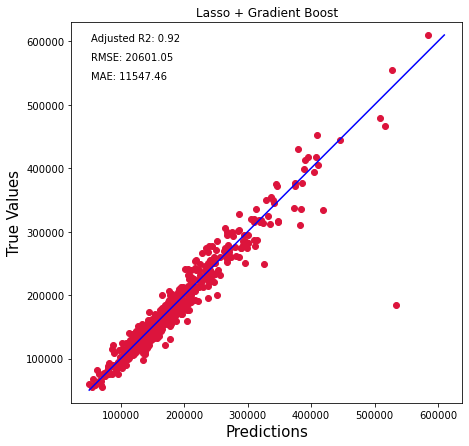

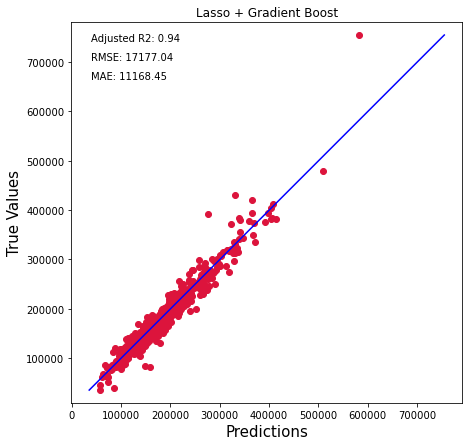

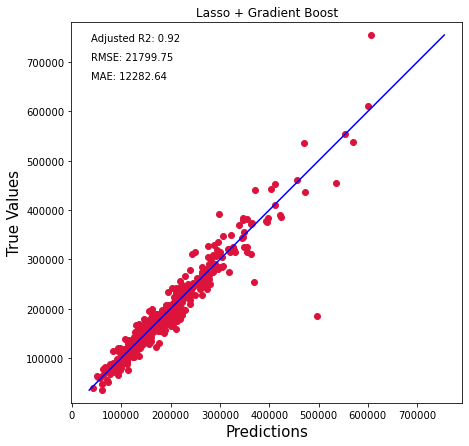

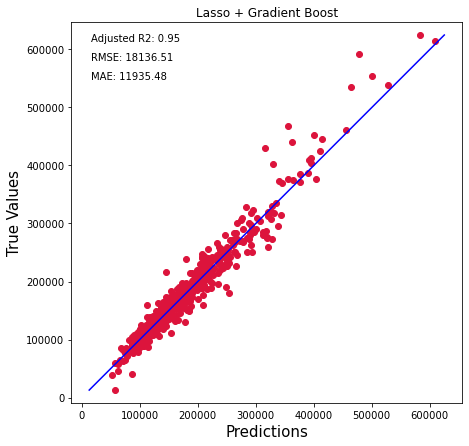

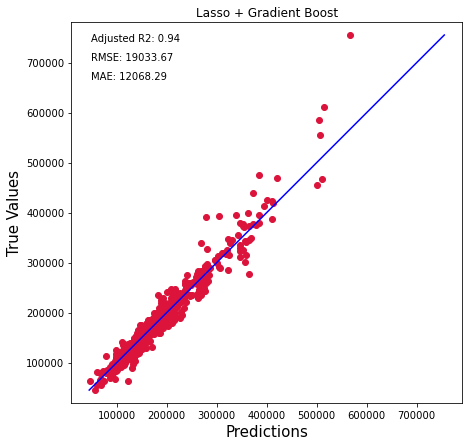

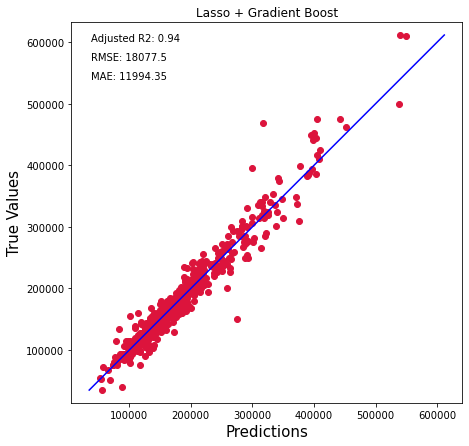

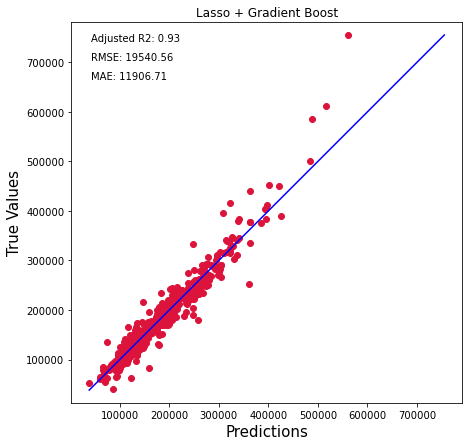

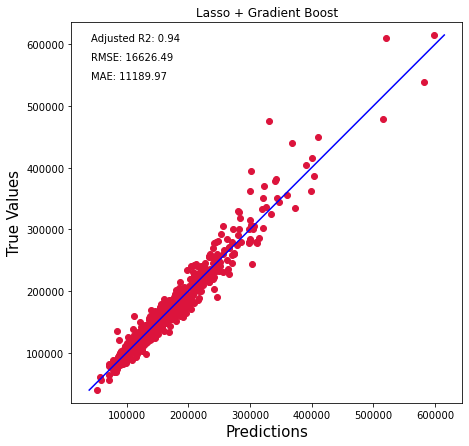

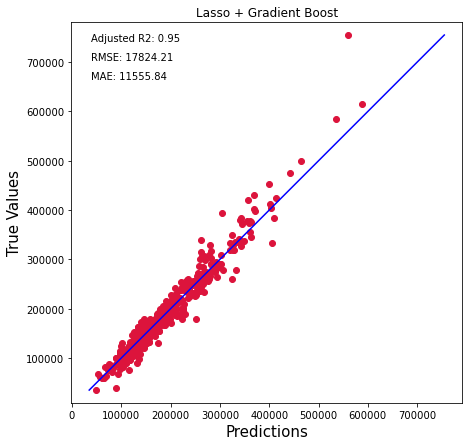

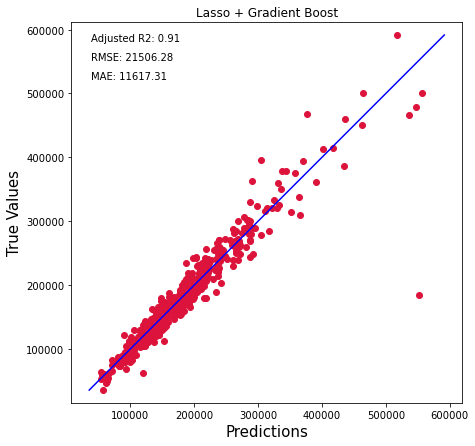

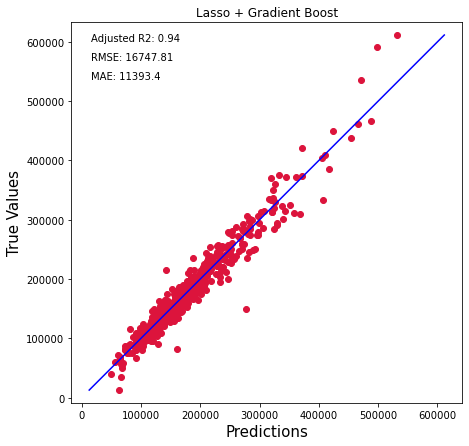

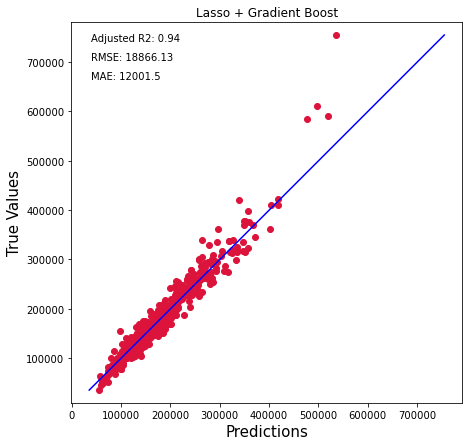

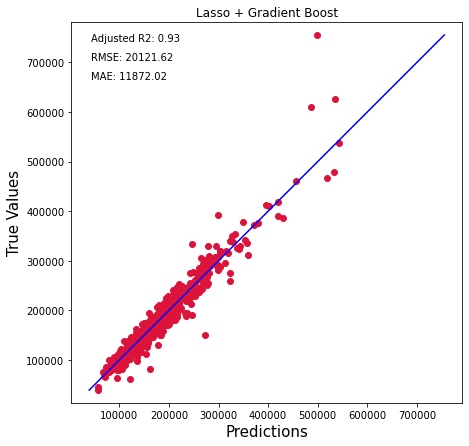

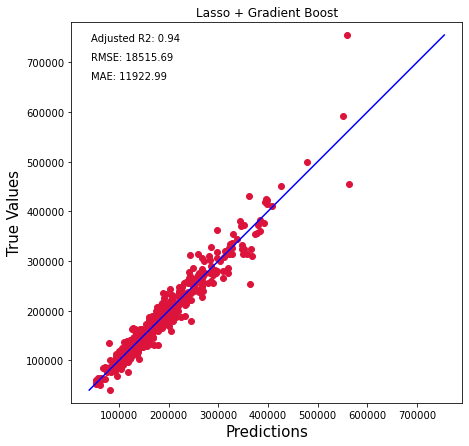

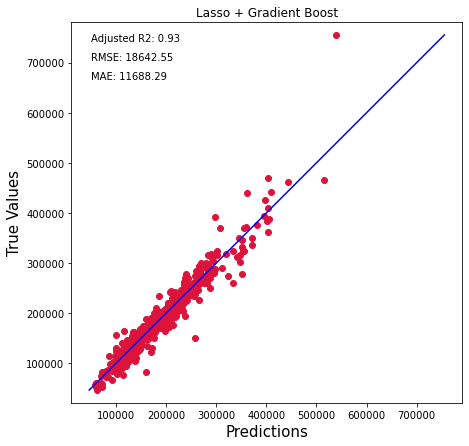

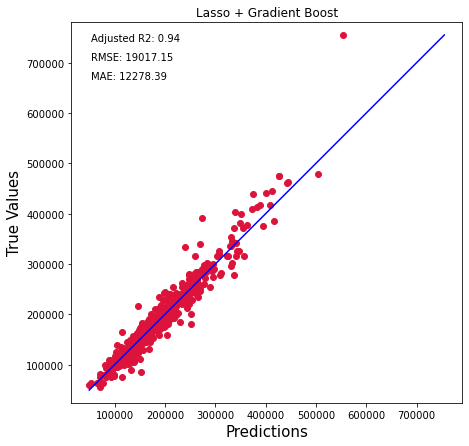

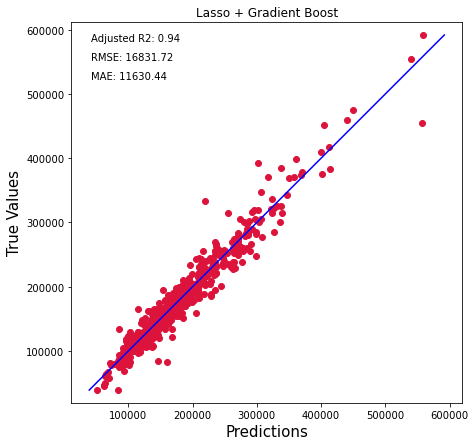

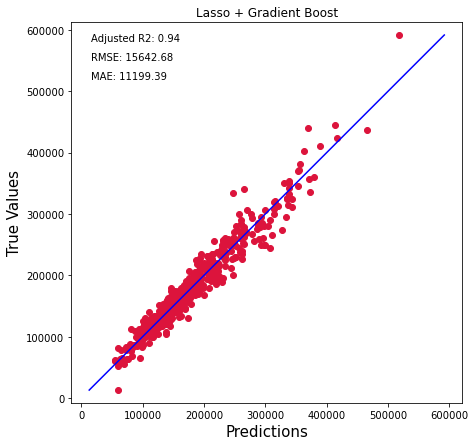

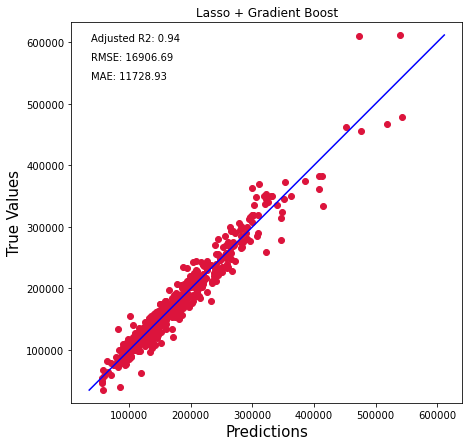

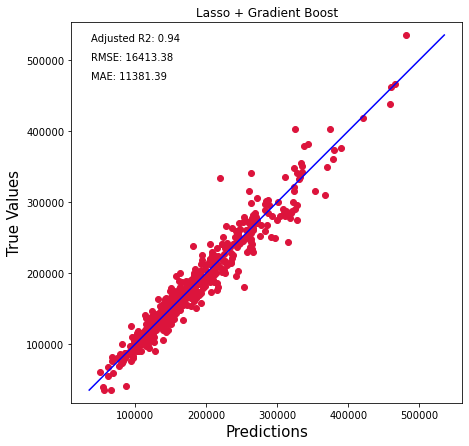

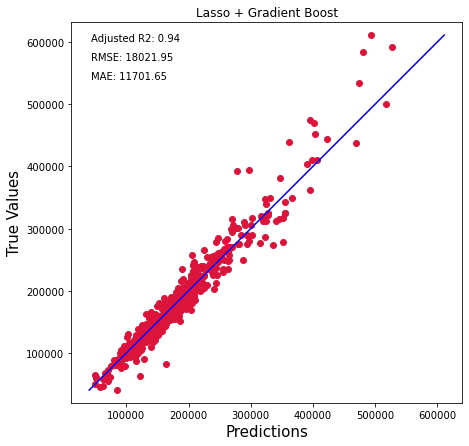

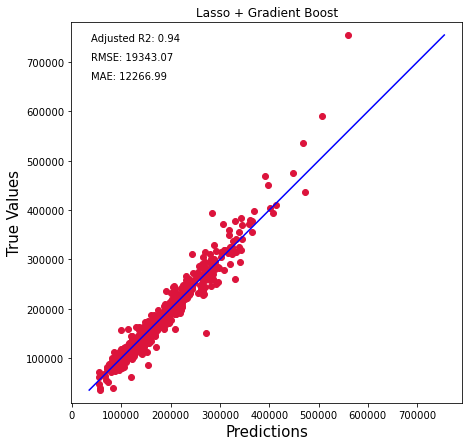

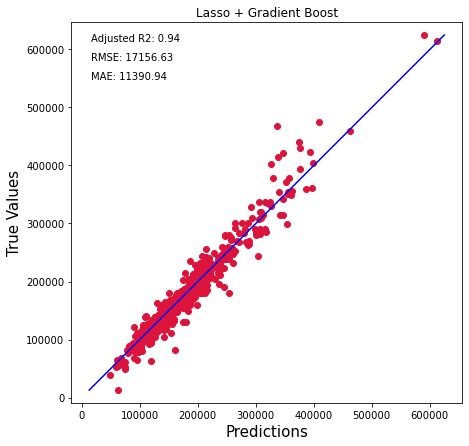

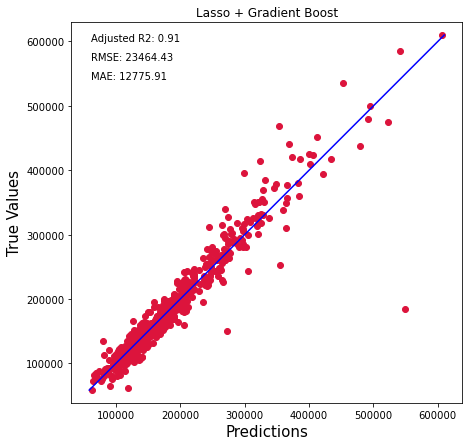

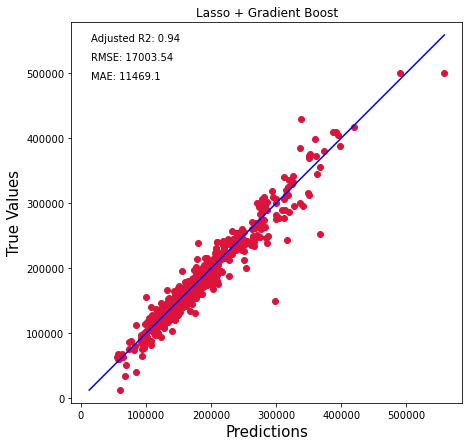

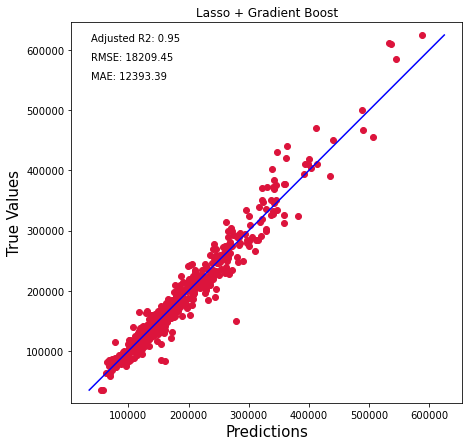

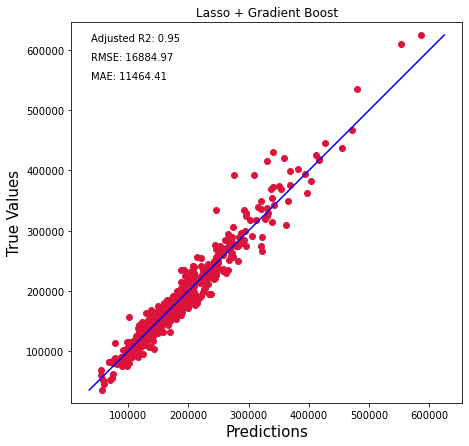

In [8]:
Scores = []
AdjR2 = []
MSE = []
RMSE = []
MAE = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    Scores.append(GBM_Score)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    mse = mean_squared_error(Y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, Y_test, c='crimson')
    
    plt.title('Lasso + Gradient Boost')
    p1 = max(max(pred), max(Y_test))
    p2 = min(min(pred), min(Y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    

In [9]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE})

In [10]:
combo

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
0,0.934280,0.932095,3.354436e+08,18315.118186,12526.062204
1,0.896211,0.892760,5.501602e+08,23455.494329,12585.148915
2,0.930429,0.928115,4.290563e+08,20713.675189,12393.561946
3,0.947672,0.945932,2.664794e+08,16324.197749,10941.822740
4,0.951066,0.949438,2.921165e+08,17091.416594,11619.601465
5,0.949973,0.948309,3.094091e+08,17590.029702,11837.777622
6,0.952398,0.950815,2.851407e+08,16886.110191,11505.360345
7,0.907143,0.904055,4.841782e+08,22004.048646,11889.643936
8,0.914033,0.911174,4.608256e+08,21466.849021,11843.788005
9,0.947774,0.946038,3.288979e+08,18135.542327,11569.988863


In [17]:
combo.to_csv('L+GB.csv', index=False)

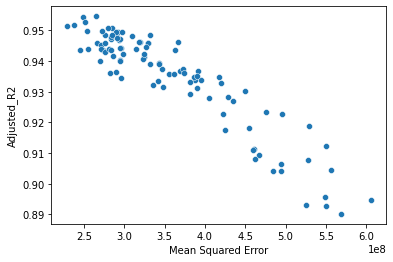

In [11]:
sns.scatterplot(data=combo, x='Mean Squared Error', y='Adjusted_R2'); 

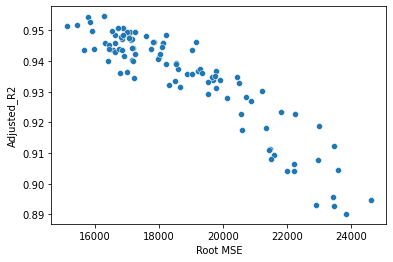

In [12]:
sns.scatterplot(data=combo, x='Root MSE', y='Adjusted_R2'); 

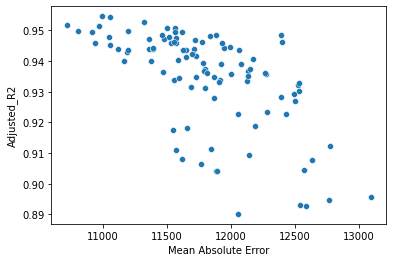

In [13]:
sns.scatterplot(data=combo, x='Mean Absolute Error', y='Adjusted_R2'); 

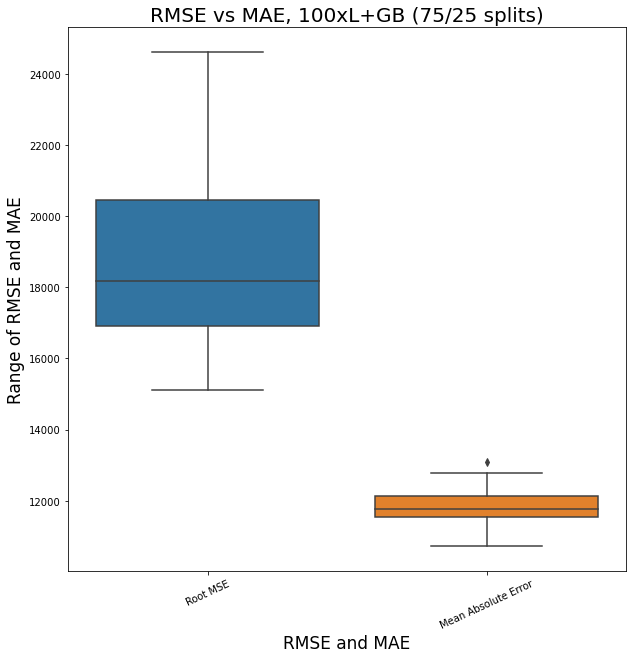

In [14]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xL+GB (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=combo[['Root MSE', 'Mean Absolute Error']])
plt.xticks(rotation=25);

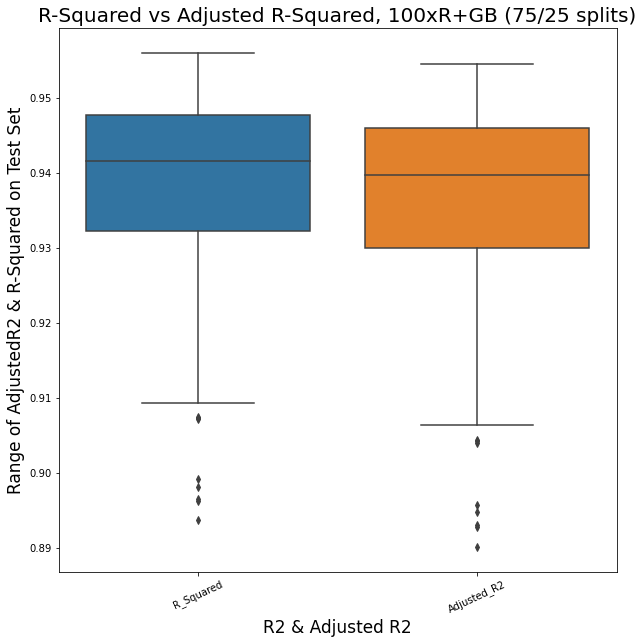

In [15]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xR+GB (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('R2 & Adjusted R2', fontsize=17)
sns.boxplot(data=combo[['R_Squared', 'Adjusted_R2']])
plt.xticks(rotation=25);

In [16]:
combo.describe()

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,0.936843,0.934743,3.581246e+08,18783.542717,11796.754721
std,0.015323,0.015833,9.071172e+07,2314.444512,483.729664
min,0.893672,0.890137,2.284184e+08,15113.518387,10720.290447
25%,0.932275,0.930023,2.856624e+08,16901.546485,11527.756381
50%,0.941649,0.939708,3.302585e+08,18172.978172,11773.456909
75%,0.947777,0.946040,4.179948e+08,20444.902752,12129.242767
max,0.956071,0.954611,6.061634e+08,24620.385770,13096.349799
